# The project architecture was created with cookiecutter

In [1]:
#cookiecutter https://github.com/drivendata/cookiecutter-data-science.git

# Download the dataset

In [2]:
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs

  7%|██▊                                    | 35.0M/492M [00:10<02:19, 3.43MB/s]^C
  7%|██▊                                    | 35.0M/492M [00:10<02:20, 3.40MB/s]
User cancelled operation


In [15]:
!cd ../data/raw

In [19]:
!pwd
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs -p ../data/raw

/Users/mildo/MyDocuments/datascience/stockforecasting/notebooks
100%|████████████████████████████████████████| 492M/492M [02:36<00:00, 3.28MB/s]
100%|████████████████████████████████████████| 492M/492M [02:36<00:00, 3.29MB/s]


In [75]:
!ls ../data/raw

ETFs
Stocks
price-volume-data-for-all-us-stocks-etfs.zip


In [76]:
#!unzip ../data/raw/price-volume-data-for-all-us-stocks-etfs.zip 

In [77]:
%matplotlib inline

In [94]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set the file paths
raw_data_path = os.path.join(os.path.pardir,'data','raw','Stocks')
train_data_path = os.path.join(raw_data_path, 'aapl.us.txt')
test_data_path = os.path.join(raw_data_path, 'aapl.us.txt')
print (train_data_path)
file=open(train_data_path,"r")
print(file.readline())
print(file.readline())
#read data with default parameters using panda df
train_df = pd.read_csv(train_data_path,index_col="Date")
test_df = pd.read_csv(test_data_path,index_col="Date")


../data/raw/Stocks/aapl.us.txt
Date,Open,High,Low,Close,Volume,OpenInt

1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0



In [79]:
def load_dataset (product,underlyer = 'aapl.us.txt', index_column = 'Date'):
    raw_data_path = os.path.join(os.path.pardir,'data','raw',product)
    data_path = os.path.join(raw_data_path, underlyer)
    print('Opening file ',data_path)
    return pd.read_csv(data_path,index_col=index_column)


def generate_train_dataset(dataset, cut_date = '2016-01-01'):
    return dataset[dataset.index<cut_date]


def generate_test_dataset(dataset, cut_date = '2016-01-01'):
    return dataset[dataset.index>cut_date]


def generate_dataset(product = 'Stocks', underlyer = 'aapl.us.txt', cut_date = '2016-01-01', index_column = 'Date'):
    dataset =  load_dataset(product, underlyer, index_column)
    train_df = generate_train_dataset(dataset, cut_date)
    test_df = generate_test_dataset(dataset, cut_date)
    return (dataset, train_df, test_df)



In [80]:
dataset, train_df, test_df = generate_dataset('Stocks','aapl.us.txt','2016-01-01')


Opening file  ../data/raw/Stocks/aapl.us.txt


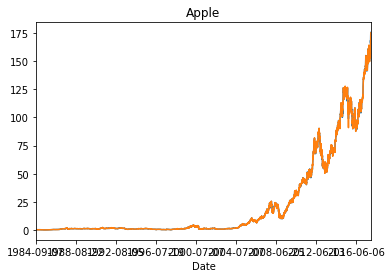

In [81]:

dataset['Close'].plot()
dataset['Open'].plot()
plt.title('Apple')
plt.show()

In [ ]:
# multiple line plot
print (dataset.index.shape, dataset.Volume.shape)
plt.plot( 'Volume', data=dataset, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot(  'Open', data=dataset, marker='', color='olive', linewidth=2)
#plt.plot(  'Close', data=dataset, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()


In [98]:
# Initialize the figure
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

num=0
for column in test_df.drop(['High','Low','OpenInt'], axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
    print( 'Hole',num)
    # Plot the lineplot
    plt.plot(test_df.index, test_df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
    print( 'Hole',num)
    # Same limits for everybody!
    plt.xlim(0,10)
    plt.ylim(-2,22)
     print( 'Hole',num)
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
     print( 'Hole',num)
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
# general title
plt.suptitle("How the 9 students improved\nthese past few days?", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 26)

In [95]:
for column in dataset.drop(['High','Low','OpenInt'], axis=1):
    print(column)

Open
Close
Volume
